In [1]:
import sys

import constants
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from PyComplexHeatmap import *
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

sys.path.insert(1, "../helper_functions")
from helper_functions import prepare_bulk

In [2]:
newcmp = constants.NEWCMP
col = constants.COL

## Bulk

In [3]:
bulk195 = prepare_bulk("../data/p195_1MB_per_bin_calls_long.bed")
bulk63 = prepare_bulk("../data/p63_1MB_per_bin_calls_long.bed")
bulk195_100kb = prepare_bulk(
    "../data/readcounts.100kb.cell_bc_p195_per_bin_calls_long.bed"
)
bulk63_100kb = prepare_bulk(
    "../data/readcounts.100kb.cell_bc_p63_per_bin_calls_long.bed"
)

# HIPSD&R

### DNA

In [4]:
cna = pd.read_csv("../data/CNVs_HIPSDR_filtered.csv.gz", index_col=0)
cna

,chr1:1-1000001,chr1:1000001-2000001,chr1:2000001-3000001,chr1:3000001-4000001,chr1:4000001-5000001,chr1:5000001-6000001,chr1:6000001-7000001,chr1:7000001-8000001,chr1:8000001-9000001,chr1:9000001-10000001,...,chrY:48000001-49000001,chrY:49000001-50000001,chrY:50000001-51000001,chrY:51000001-52000001,chrY:52000001-53000001,chrY:53000001-54000001,chrY:54000001-55000001,chrY:55000001-56000001,chrY:56000001-57000001,chrY:57000001-58000001
TTCAGGTAGTAAGAAC-1,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
TGCAGGCTCGGTTTGG-1,4,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
CCTTATGTCTAGCGAT-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
TACTTCGTCGCCTAAG-1,4,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
AGGTATTGTAGGTTGC-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAAACTGGTAACCACA-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
ACGCAAGCACGTTACA-1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
AATCCGTAGGTTTACA-1,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
TCCCGTTAGCTCAAAC-1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


In [5]:
single_og = cna.copy()

In [6]:
bulk = bulk195[["CN"]]
bulk.columns = ["bulk"]
bulk_df = bulk.T

In [7]:
rna = pd.read_csv("../data/numbat_rna_windows_1000.csv.gz", index_col=0)
rna

,chr1:1-1000001,chr1:1000001-2000001,chr1:2000001-3000001,chr1:3000001-4000001,chr1:5000001-6000001,chr1:6000001-7000001,chr1:7000001-8000001,chr1:8000001-9000001,chr1:9000001-10000001,chr1:10000001-11000001,...,chr22:39000001-40000001,chr22:40000001-41000001,chr22:41000001-42000001,chr22:42000001-43000001,chr22:43000001-44000001,chr22:44000001-45000001,chr22:45000001-46000001,chr22:46000001-47000001,chr22:49000001-50000001,chr22:50000001-51000001
cell,,,,,,,,,,,,,,,,,,,,,
TTCAGGTAGTAAGAAC-1,-0.531353,-0.232545,-0.075131,-0.142764,-0.200173,-0.160661,-0.134628,-0.098221,-0.037736,-0.095430,...,-0.237072,-0.145938,-0.144278,-0.128853,-0.123660,-0.076461,-0.042383,-0.117058,-0.156430,-0.222118
TGCAGGCTCGGTTTGG-1,-0.082052,0.012359,0.012484,0.023723,0.095256,0.091510,0.130663,0.123426,0.210416,0.178911,...,-0.502003,-0.434460,-0.410719,-0.298294,-0.275559,-0.256599,-0.251552,-0.235859,-0.230878,-0.227022
CCTTATGTCTAGCGAT-1,-0.123053,0.053503,0.064923,-0.004466,-0.041234,-0.022449,0.031879,0.004840,-0.078744,-0.119580,...,-0.154677,-0.127359,-0.149698,-0.180307,-0.248643,-0.260585,-0.263889,-0.303671,-0.361119,-0.538877
TACTTCGTCGCCTAAG-1,-0.162781,-0.169573,-0.123738,-0.115758,-0.101020,-0.011202,0.113965,0.106728,0.100131,0.083435,...,-0.197147,-0.225259,-0.281439,-0.309525,-0.301406,-0.293995,-0.310693,-0.322891,-0.362009,-0.381805
AGGTATTGTAGGTTGC-1,-0.666418,-0.630849,-0.524815,-0.539091,-0.555847,-0.498372,-0.466889,-0.474126,-0.457343,-0.418373,...,0.029208,0.062855,0.050345,0.018127,-0.053379,-0.047838,-0.025622,-0.087729,-0.189053,-0.270406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAAACTGGTAACCACA-1,-0.623106,-0.563003,-0.408362,-0.324703,-0.348364,-0.326025,-0.300706,-0.273302,-0.153908,-0.072293,...,0.010697,-0.016410,-0.194310,-0.230914,-0.253359,-0.214147,-0.183921,-0.223601,-0.216081,-0.354127
ACGCAAGCACGTTACA-1,0.274805,0.296255,0.243418,0.184964,0.119812,0.109583,0.089548,0.025660,0.004116,0.058138,...,-0.257692,-0.217567,-0.346255,-0.321199,-0.349293,-0.300588,-0.270061,-0.254736,-0.203969,-0.180449
AATCCGTAGGTTTACA-1,-0.019917,0.121602,0.217997,0.181996,0.189698,0.111394,0.128553,0.175701,0.009257,-0.145637,...,-0.651390,-0.676135,-0.633927,-0.657412,-0.610931,-0.579585,-0.582921,-0.675314,-0.648364,-0.614104


In [8]:
join = pd.concat([bulk_df, cna, rna])
join = join.dropna(axis=1)
columns = join.columns

In [9]:
cut_chroms = pd.DataFrame(
    [x.split(":")[0][3:] for x in columns], columns=["chromosome"], index=columns
)

In [10]:
cut_chroms

,chromosome
chr1:1-1000001,1
chr1:1000001-2000001,1
chr1:2000001-3000001,1
chr1:3000001-4000001,1
chr1:5000001-6000001,1
...,...
chr22:44000001-45000001,22
chr22:45000001-46000001,22
chr22:46000001-47000001,22
chr22:49000001-50000001,22


## Bulk

In [11]:
cut_chroms_intersect = cut_chroms

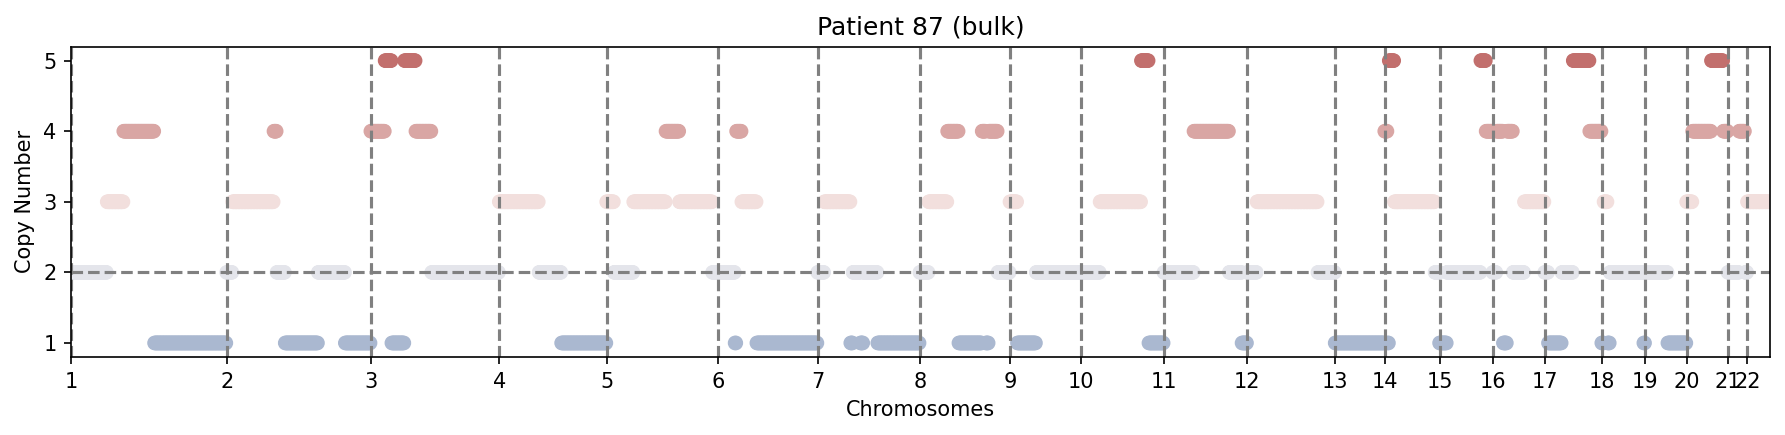

In [12]:
f, axs = plt.subplots(figsize=(12, 3), dpi=150)
# DNA
##################################################
ax = axs
tmp = bulk195.loc[cut_chroms_intersect.index].copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x=tmp.chromosome.values, y=tmp.CN.values, c=tmp.CN.values, cmap=newcmp)

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls="--", color="grey")

ax.axhline(2, ls="--", color="grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Copy Number")
ax.set_title("Patient 87 (bulk)")

plt.xlim(0, len(cut_chroms))


plt.tight_layout()
plt.savefig("figure2/patient87_bulk.png", dpi=300)
plt.savefig("figure2/patient87_bulk.svg", dpi=300)

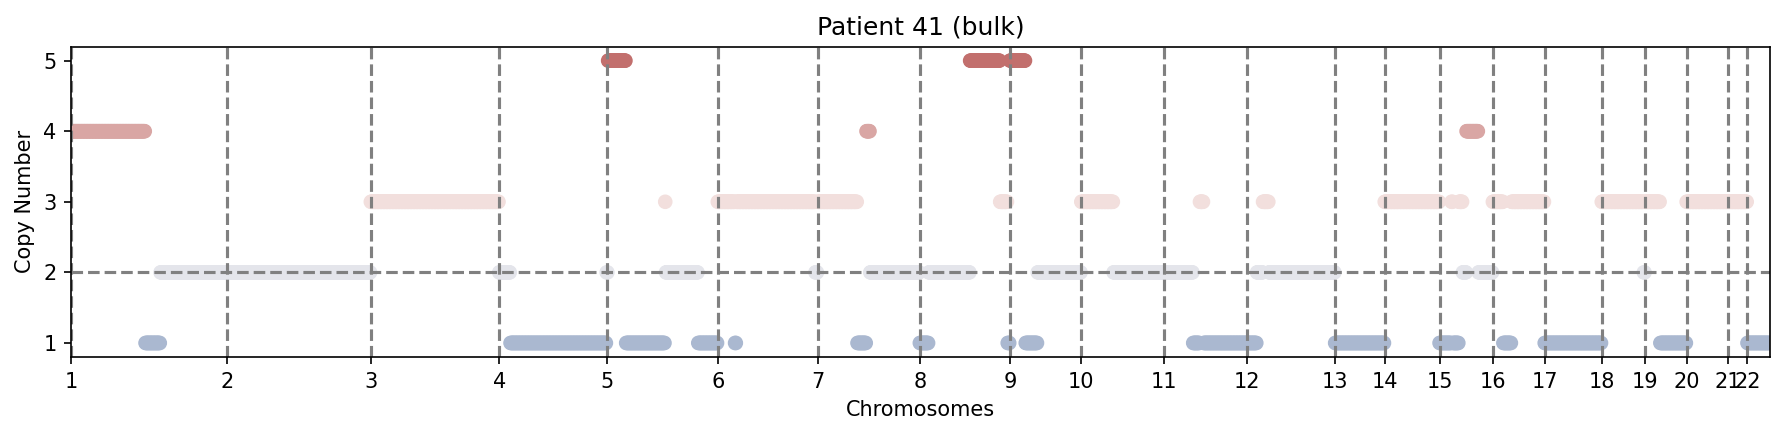

In [13]:
f, axs = plt.subplots(figsize=(12, 3), dpi=150)
# DNA
##################################################
ax = axs
tmp = bulk63.loc[cut_chroms_intersect.index].copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x=tmp.chromosome.values, y=tmp.CN.values, c=tmp.CN.values, cmap=newcmp)

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls="--", color="grey")

ax.axhline(2, ls="--", color="grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Copy Number")
ax.set_title("Patient 41 (bulk)")

plt.xlim(0, len(cut_chroms))

plt.tight_layout()
plt.savefig("figure2/patient41_bulk.png", dpi=300)
plt.savefig("figure2/patient41_bulk.svg", dpi=300)

In [14]:
cut_chroms_intersect

,chromosome
chr1:1-1000001,1
chr1:1000001-2000001,1
chr1:2000001-3000001,1
chr1:3000001-4000001,1
chr1:5000001-6000001,1
...,...
chr22:44000001-45000001,22
chr22:45000001-46000001,22
chr22:46000001-47000001,22
chr22:49000001-50000001,22


In [15]:
cna = cna.reindex(columns=cut_chroms_intersect.index)

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(cna)

KMeans(n_clusters=2, random_state=42)

In [17]:
labels = kmeans.labels_

In [18]:
df1 = pd.DataFrame(
    [
        cna.apply(
            lambda row: pearsonr(row, bulk195.loc[cut_chroms_intersect.index].CN)[0],
            axis=1,
        ),
        cna.apply(
            lambda row: pearsonr(row, bulk63.loc[cut_chroms_intersect.index].CN)[0],
            axis=1,
        ),
    ]
)

In [19]:
df1 = df1.T
df1.columns = ["bulk_p195", "bulk_p63"]

In [20]:
df1["clusters"] = labels
df1["clusters"] = df1["clusters"].replace(0, "Cluster 0")
df1["clusters"] = df1["clusters"].replace(1, "Cluster 1")

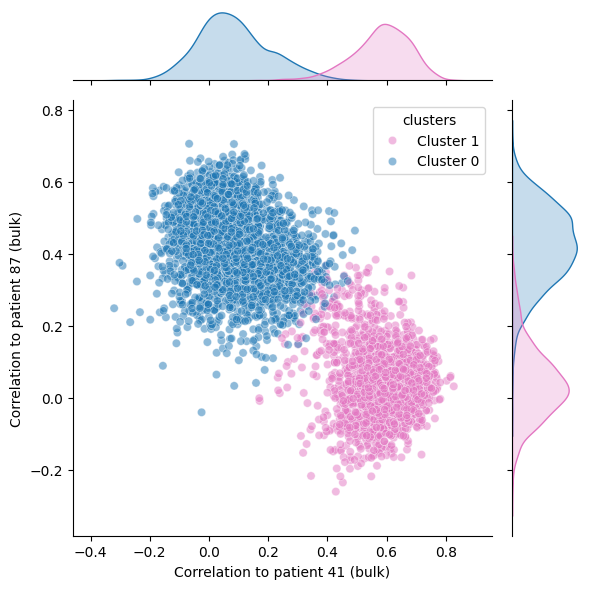

In [21]:
g = sns.jointplot(
    x="bulk_p63",
    y="bulk_p195",
    data=df1,
    hue="clusters",
    alpha=0.5,
    palette={
        "Cluster 1": sns.palettes.color_palette("tab10")[6],
        "Cluster 0": sns.palettes.color_palette("tab10")[0],
    },
)

plt.xlabel("Correlation to patient 41 (bulk)")
plt.ylabel("Correlation to patient 87 (bulk)")
plt.tight_layout()

plt.savefig("figure2/correlation.png", dpi=300)

In [22]:
df1.value_counts("clusters") / df1.value_counts("clusters").sum()

clusters
Cluster 0    0.596974
Cluster 1    0.403026
Name: count, dtype: float64

In [23]:
df1.to_csv("../data/single_cells_1mb_clusters_final.csv")

### RNA

In [24]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Number of clusters
kmeans.fit(rna)

KMeans(n_clusters=2, random_state=42)

In [25]:
labels = kmeans.labels_

In [26]:
df2 = pd.DataFrame(
    [
        rna.apply(
            lambda row: pearsonr(row, bulk195.loc[cut_chroms_intersect.index].CN)[0],
            axis=1,
        ),
        rna.apply(
            lambda row: pearsonr(row, bulk63.loc[cut_chroms_intersect.index].CN)[0],
            axis=1,
        ),
    ]
)

In [27]:
df2 = df2.T
df2.columns = ["bulk_p195", "bulk_p63"]

In [28]:
df2["clusters"] = labels
df2["clusters"] = df2["clusters"].replace(0, "Cluster 0")
df2["clusters"] = df2["clusters"].replace(1, "Cluster 1")

<Figure size 800x800 with 0 Axes>

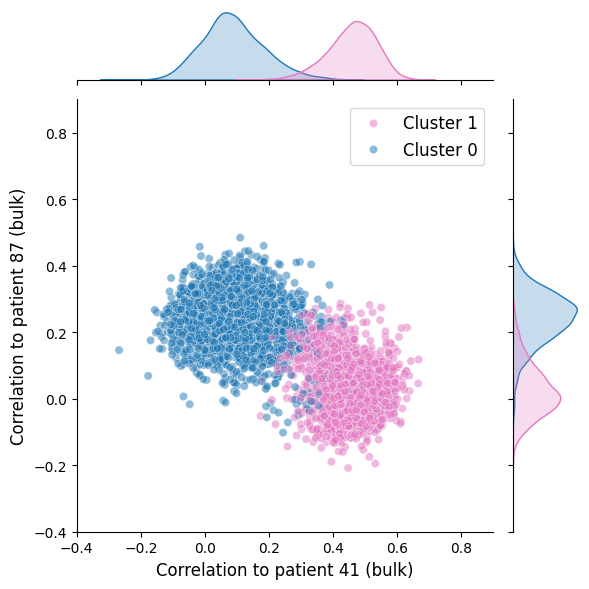

In [29]:
plt.figure(figsize=(8, 8))
g = sns.jointplot(
    x="bulk_p63",
    y="bulk_p195",
    data=df2,
    hue="clusters",
    alpha=0.5,
    palette={
        "Cluster 1": sns.palettes.color_palette("tab10")[6],
        "Cluster 0": sns.palettes.color_palette("tab10")[0],
    },
)

plt.xlabel("Correlation to patient 41 (bulk)", fontsize=12)
plt.ylabel("Correlation to patient 87 (bulk)", fontsize=12)
plt.xlim(-0.4, 0.9)
plt.ylim(-0.4, 0.9)
plt.tight_layout()
plt.legend(fontsize=12)

plt.savefig("figure2/rna_correlation_final.png", dpi=300)
plt.savefig("figure2/rna_correlation_final.svg", dpi=300)

In [30]:
df2.to_csv("../data/rna_1mb_clusters.csv")

In [31]:
df2.value_counts("clusters") / df2.value_counts("clusters").sum()

clusters
Cluster 0    0.582531
Cluster 1    0.417469
Name: count, dtype: float64

### DNA heatmap

In [32]:
newcmp = sns.color_palette("vlag", 6)[1:]
newcmp[1] = (1, 1, 1)
newcmp = ListedColormap(newcmp, "my_cmap3")

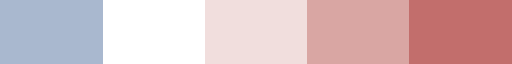

In [33]:
newcmp

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


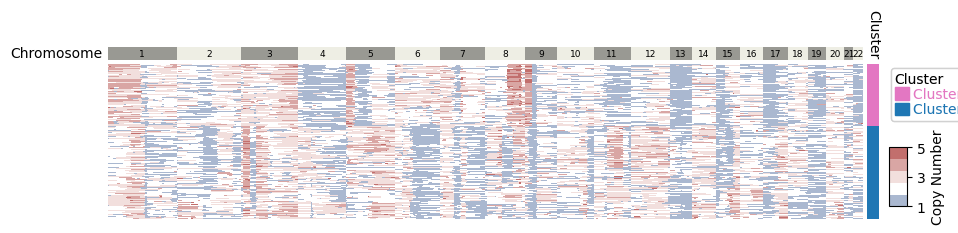

In [34]:
plt.figure(figsize=(10, 2))

col_ha = HeatmapAnnotation(
    Chromosome=anno_simple(
        cut_chroms_intersect.chromosome,
        add_text=True,
        colors=col,
        text_kws={"color": "black"},
    ),
    plot_legend=False,
    axis=1,
    rasterized=True,
    label_side="left",
    verbose=0,
)
row_ha = HeatmapAnnotation(
    Cluster=anno_simple(
        df1.clusters,
        add_text=False,
        colors={
            "Cluster 1": sns.palettes.color_palette("tab10")[6],
            "Cluster 0": sns.palettes.color_palette("tab10")[0],
        },
    ),
    plot_legend=True,
    axis=0,
    rasterized=True,
)
cm1 = ClusterMapPlotter(
    data=cna[cut_chroms_intersect.index],
    row_dendrogram=False,
    show_rownames=False,
    show_colnames=False,
    top_annotation=col_ha,
    right_annotation=row_ha,
    row_cluster_metric="cityblock",
    row_cluster_method="ward",
    col_cluster=False,
    row_cluster=True,
    label="Copy Number",
    cmap=newcmp,
    rasterized=True,
    row_split=df1.clusters,
    row_split_gap=0,
    row_split_order=["Cluster 1", "Cluster 0"],
)

plt.savefig("figure2/dna_singlecells.png", dpi=300)
plt.savefig("figure2/dna_singlecells.svg", dpi=300)
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


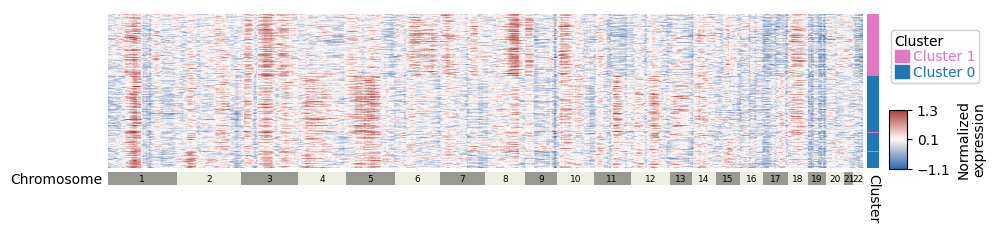

In [35]:
plt.figure(figsize=(10, 2))

col_ha = HeatmapAnnotation(
    Chromosome=anno_simple(
        cut_chroms_intersect.chromosome,
        add_text=True,
        colors=col,
        text_kws={"color": "black"},
    ),
    plot_legend=False,
    axis=1,
    plot=False,
    label_side="left",
)
row_ha = HeatmapAnnotation(
    Cluster=anno_simple(
        df2.clusters,
        add_text=False,
        colors={
            "Cluster 1": sns.palettes.color_palette("tab10")[6],
            "Cluster 0": sns.palettes.color_palette("tab10")[0],
        },
    ),
    plot_legend=True,
    axis=0,
    rasterized=True,
    label_side="bottom",
)
cm_rna = ClusterMapPlotter(
    data=rna.loc[cm1.row_order[0] + cm1.row_order[1]],
    row_dendrogram=False,
    show_rownames=False,
    show_colnames=False,
    col_cluster=False,
    plot_legend=True,
    row_cluster=False,
    label="Normalized\nexpression",
    cmap="vlag",
    vmin=-1.1,
    vmax=1.3,
    bottom_annotation=col_ha,
    right_annotation=row_ha,
)

plt.savefig("figure2/rna_mix_final.png", dpi=300)
plt.savefig("figure2/rna_mix_final.pdf", dpi=100)
plt.show()

In [36]:
cell_order0, cell_order1 = cm1.row_order[0], cm1.row_order[1]

## Metacells

In [37]:
new_data = {"chromosome": []}
new_index = []

# Process each row of the original DataFrame
for idx, row in cut_chroms_intersect.iterrows():
    chrom = row["chromosome"]
    # Parse the original bin range
    chrom_name, bin_range = idx.split(":")
    start, end = map(int, bin_range.split("-"))

    # Create new bins with size 100,000
    for new_start in range(start, end, 100000):
        new_end = min(new_start + 100000, end)
        new_index.append(f"{chrom_name}:{new_start}-{new_end}")
        new_data["chromosome"].append(chrom)

# Create the new DataFrame
new_df = pd.DataFrame(new_data, index=new_index)

print(new_df)

                        chromosome
chr1:1-100001                    1
chr1:100001-200001               1
chr1:200001-300001               1
chr1:300001-400001               1
chr1:400001-500001               1
...                            ...
chr22:50500001-50600001         22
chr22:50600001-50700001         22
chr22:50700001-50800001         22
chr22:50800001-50900001         22
chr22:50900001-51000001         22

[22620 rows x 1 columns]


In [38]:
cna = pd.read_csv("../data/CNVs_HIPSDR_metacells_100kb.csv.gz", index_col=0)
cna

,chr1:1-100001,chr1:400001-500001,chr1:800001-900001,chr1:1200001-1300001,chr1:1600001-1700001,chr1:2100001-2200001,chr1:2500001-2600001,chr1:2900001-3000001,chr1:3300001-3400001,chr1:3700001-3800001,...,chrY:53400001-53500001,chrY:54500001-54600001,chrY:55500001-55600001,chrY:56600001-56700001,chrY:8300001-8400001,chrY:16700001-16800001,chrY:25100001-25200001,chrY:33500001-33600001,chrY:41900001-42000001,chrY:50300001-50400001
662_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
649_per_bin_calls_long,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
868_per_bin_calls_long,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
851_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
834_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165_per_bin_calls_long,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
812_per_bin_calls_long,4,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
859_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
707_per_bin_calls_long,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1


In [39]:
cna = cna.reindex(columns=[c for c in new_df.index if c in cna.columns])
cna

,chr1:1-100001,chr1:100001-200001,chr1:200001-300001,chr1:300001-400001,chr1:400001-500001,chr1:500001-600001,chr1:600001-700001,chr1:700001-800001,chr1:800001-900001,chr1:900001-1000001,...,chr22:49900001-50000001,chr22:50000001-50100001,chr22:50100001-50200001,chr22:50200001-50300001,chr22:50300001-50400001,chr22:50400001-50500001,chr22:50500001-50600001,chr22:50600001-50700001,chr22:50700001-50800001,chr22:50800001-50900001
662_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
649_per_bin_calls_long,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
868_per_bin_calls_long,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
851_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
834_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165_per_bin_calls_long,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
812_per_bin_calls_long,4,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
859_per_bin_calls_long,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
707_per_bin_calls_long,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1


In [40]:
new_df = new_df.loc[cna.columns]
new_df

,chromosome
chr1:1-100001,1
chr1:100001-200001,1
chr1:200001-300001,1
chr1:300001-400001,1
chr1:400001-500001,1
...,...
chr22:50400001-50500001,22
chr22:50500001-50600001,22
chr22:50600001-50700001,22
chr22:50700001-50800001,22


In [41]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Number of clusters
kmeans.fit(cna)

KMeans(n_clusters=2, random_state=42)

In [42]:
labels = kmeans.labels_

In [43]:
df_metacells = pd.DataFrame(
    [
        cna.apply(
            lambda row: pearsonr(row, bulk195_100kb.loc[cna.columns].CN)[0], axis=1
        ),
        cna.apply(
            lambda row: pearsonr(row, bulk63_100kb.loc[cna.columns].CN)[0], axis=1
        ),
    ]
)

In [44]:
df_metacells = df_metacells.T
df_metacells.columns = ["bulk_p195", "bulk_p63"]

In [45]:
df_metacells["clusters"] = labels
df_metacells["clusters"] = df_metacells["clusters"].replace(0, "Cluster 0")
df_metacells["clusters"] = df_metacells["clusters"].replace(1, "Cluster 1")

df1.to_csv("../HIPSDR-seq/rebuttal_clusters.csv")

/var/folders/zr/5fr8vc4j0ld_zppj3b771d700000gr/T/ipykernel_75280/4240910692.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 800x800 with 0 Axes>

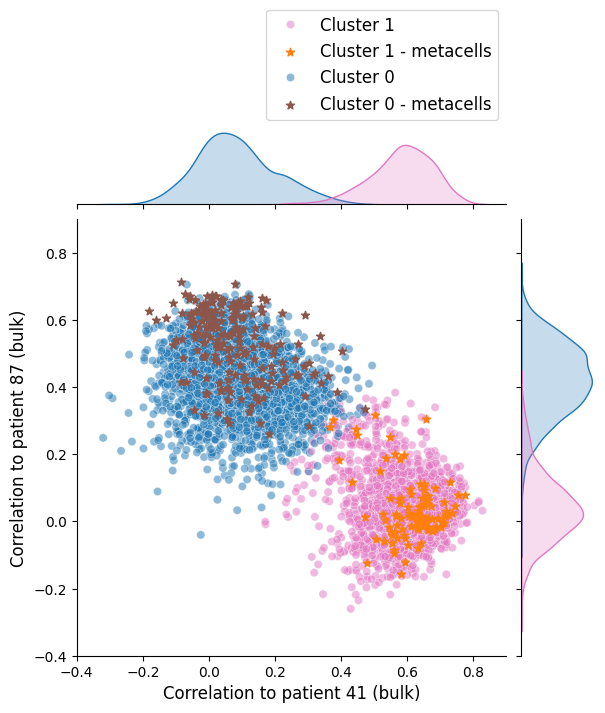

In [46]:
plt.figure(figsize=(8, 8))
joint_plot = sns.jointplot(
    x="bulk_p63",
    y="bulk_p195",
    data=df1,
    hue="clusters",
    alpha=0.5,
    palette={
        "Cluster 1": sns.palettes.color_palette("tab10")[6],
        "Cluster 0": sns.palettes.color_palette("tab10")[0],
    },
)

joint_plot.ax_joint.scatter(
    df_metacells[df_metacells["clusters"] == "Cluster 1"]["bulk_p63"],
    df_metacells[df_metacells["clusters"] == "Cluster 1"]["bulk_p195"],
    c=[sns.palettes.color_palette("tab10")[1]],
    marker="*",
    label="Cluster 1 - metacells",
)
joint_plot.ax_joint.scatter(
    df_metacells[df_metacells["clusters"] == "Cluster 0"]["bulk_p63"],
    df_metacells[df_metacells["clusters"] == "Cluster 0"]["bulk_p195"],
    c=[sns.palettes.color_palette("tab10")[5]],
    marker="*",
    label="Cluster 0 - metacells",
)

handles, labels = plt.gca().get_legend_handles_labels()
order = ["Cluster 1", "Cluster 1 - metacells", "Cluster 0", "Cluster 0 - metacells"]
# Specify the desired order of labels
handles = [handles[labels.index(label)] for label in order]
labels = order

# Update the legend
plt.legend(handles, labels, bbox_to_anchor=(1, 1.5), fontsize=12)
plt.xlim(-0.4, 0.9)
plt.ylim(-0.4, 0.9)
plt.xlabel("Correlation to patient 41 (bulk)", fontsize=12)
plt.ylabel("Correlation to patient 87 (bulk)", fontsize=12)
plt.tight_layout()

plt.savefig("figure2/correlation_metacells.png", dpi=300)
plt.savefig("figure2/correlation_metacells.svg", dpi=300)

In [47]:
df_metacells.value_counts("clusters") / df_metacells.value_counts("clusters").sum()

clusters
Cluster 0    0.645485
Cluster 1    0.354515
Name: count, dtype: float64

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


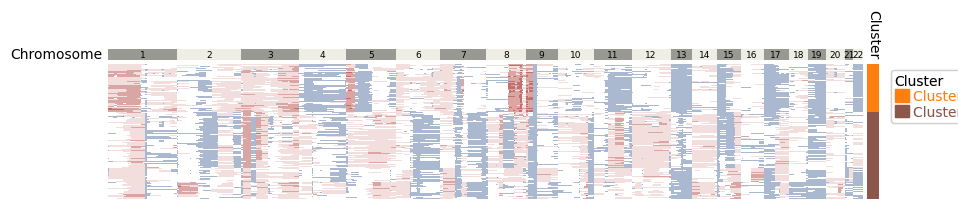

In [48]:
plt.figure(figsize=(10, 2))

col_ha = HeatmapAnnotation(
    Chromosome=anno_simple(
        new_df.chromosome, add_text=True, colors=col, text_kws={"color": "black"}
    ),
    plot_legend=False,
    axis=1,
    rasterized=True,
    label_side="left",
    verbose=0,
)
row_ha = HeatmapAnnotation(
    Cluster=anno_simple(
        df_metacells.clusters,
        add_text=False,
        colors={
            "Cluster 1": sns.palettes.color_palette("tab10")[1],
            "Cluster 0": sns.palettes.color_palette("tab10")[5],
        },
    ),
    plot_legend=True,
    axis=0,
    rasterized=True,
)
cm1 = ClusterMapPlotter(
    data=cna[new_df.index],
    row_dendrogram=False,
    show_rownames=False,
    show_colnames=False,
    top_annotation=col_ha,
    right_annotation=row_ha,
    row_cluster_metric="cityblock",
    row_cluster_method="ward",
    col_cluster=False,
    row_cluster=True,
    label="Copy Number",
    cmap=newcmp,
    rasterized=True,
    legend=False,
    row_split=df_metacells.clusters,
    row_split_gap=0,
    row_split_order=["Cluster 1", "Cluster 0"],
)

plt.savefig("figure2/dna_metacells.png", dpi=300)
plt.savefig("figure2/dna_metacells.svg", dpi=300)
plt.show()

In [49]:
meta_order0, meta_order1 = cm1.row_order[0], cm1.row_order[1]